In [1]:
import numpy as np
import pandas as pd
import copy as cp
import pandas as pd
import matplotlib.pyplot as plt
from SlidingWindows import *
from Network import *

In [150]:
data = pd.read_csv('../data/sales_train_evaluation.csv')
data.head()

KeyboardInterrupt: 

In [3]:
def events_in_range(data, r):
    x = []; y = []
    for i in range(0,1941,r):
        if (i + r <= 1941):
            x.append(i // r + 1)
            y.append((r - data[i:i+r].count(None)))
    return x, y

In [117]:
N = 1913

item_id = 'HOBBIES_1_001'
store_id = 'CA_1'
example = data[(data['item_id'] == item_id) & (data['store_id'] == 'CA_1')].to_numpy()[0][6:]
example.size

previous_days = 7
start = 1000

data_previous = np.array()

for i in range(0, previous_days):


t = np.arange(1000, N, 1).reshape(-1,1)
x1 = np.array([example[i-1] if i - 1 >= 0 else 0 for i in range(1000,N)]).reshape(-1,1)
x2 = np.array([example[i-2] if i - 2 >= 0 else 0 for i in range(1000,N)]).reshape(-1,1)
x3 = np.array([example[i-3] if i - 3 >= 0 else 0 for i in range(1000,N)]).reshape(-1,1)
x4 = np.array([example[i-4] if i - 4 >= 0 else 0 for i in range(1000,N)]).reshape(-1,1)
x5 = np.array([example[i-5] if i - 5 >= 0 else 0 for i in range(1000,N)]).reshape(-1,1)
x6 = np.array([example[i-6] if i - 6 >= 0 else 0 for i in range(1000,N)]).reshape(-1,1)
x7 = np.array([example[i-7] if i - 7 >= 0 else 0 for i in range(1000,N)]).reshape(-1,1)
# np.insert(x1, 1, 4120, axis=0)
y = np.array(example[start:]).reshape(-1,1)
y.size

941

In [5]:
cat_id = "HOBBIES"

state_id_1 = "CA"
category_state = data[(data['cat_id'] == cat_id) & (data['state_id'] == state_id_1)].to_numpy()[:,6:]
category_state.shape
y3 = np.sum(category_state, axis = 0)
print(y3.shape)

state_id_2 = "TX"
category_state = data[(data['cat_id'] == cat_id) & (data['state_id'] == state_id_2)].to_numpy()[:,6:]
category_state.shape
y4 = np.sum(category_state, axis = 0)
print(y4.shape)

state_id_3 = "WI"
category_state = data[(data['cat_id'] == cat_id) & (data['state_id'] == state_id_3)].to_numpy()[:,6:]
category_state.shape
y5 = np.sum(category_state, axis = 0)
print(y5.shape)

(1941,)
(1941,)
(1941,)


In [10]:
def divide(a, b):
    return np.divide(a, b, out=np.zeros_like(a), where=b!=0)

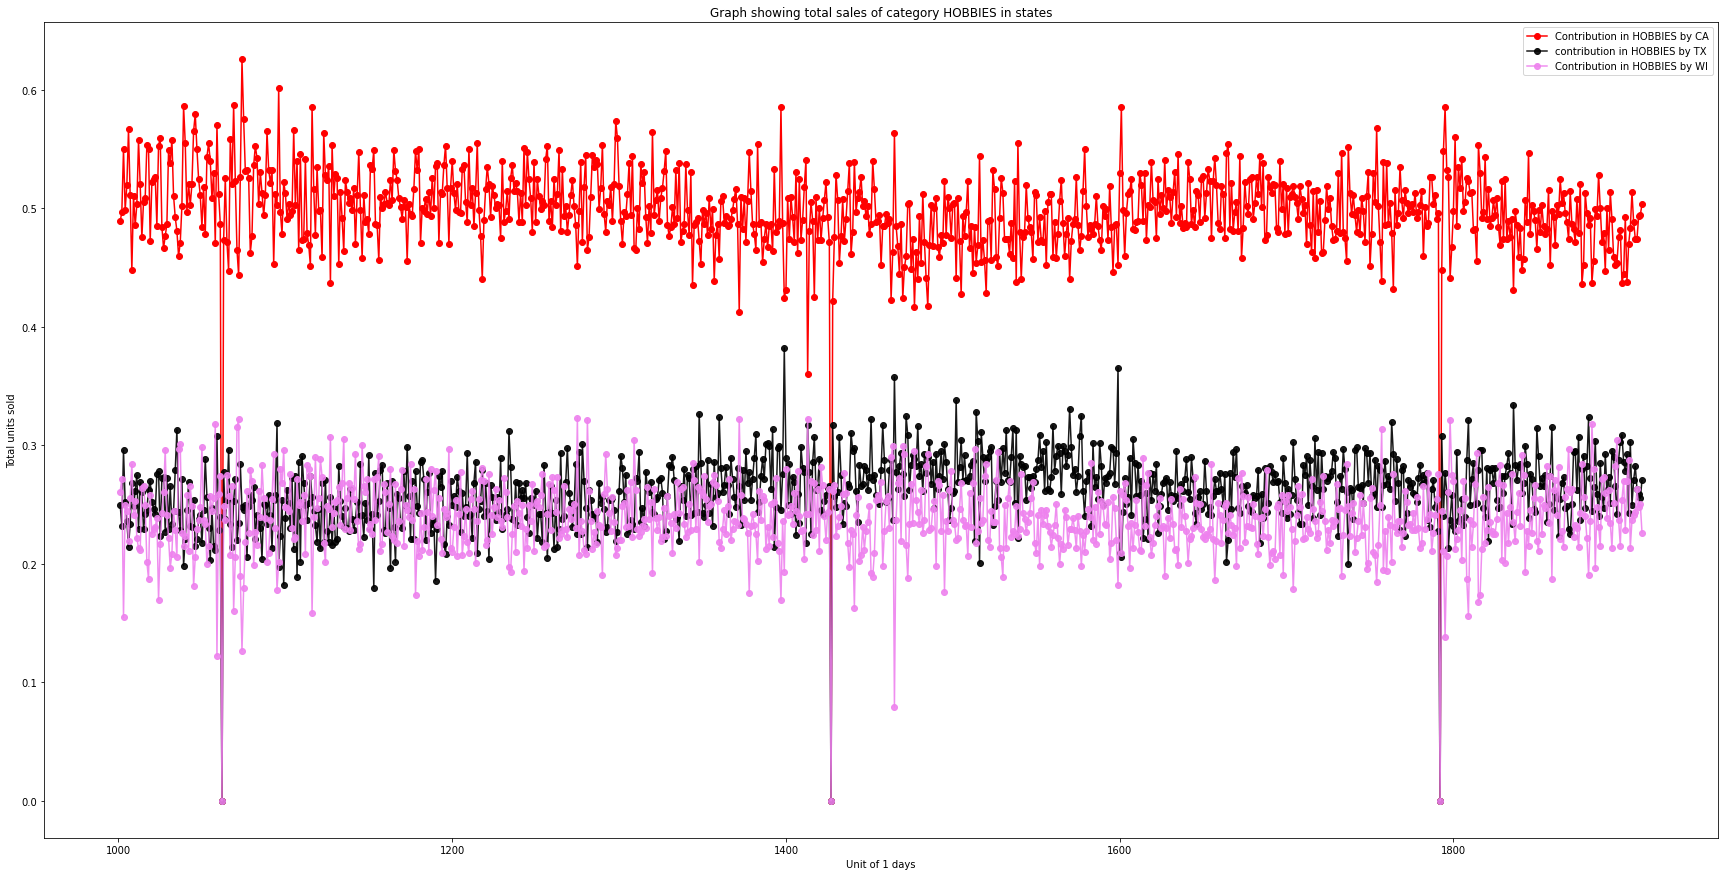

In [11]:
start = 1000
end = 1913
_max = 1913

x = range(1, _max + 1)

plt.figure(figsize=(30, 15))

plt.plot(x[start:end], divide(y3[start:end], y3[start:end] + y4[start:end] + y5[start:end]),label=f'Contribution in {cat_id} by {state_id_1}',marker='o', c="r", alpha=1)
plt.plot(x[start:end], divide(y4[start:end], y3[start:end] + y4[start:end] + y5[start:end]),label=f'contribution in {cat_id} by {state_id_2}',marker='o', c="black", alpha=0.9)
plt.plot(x[start:end], divide(y5[start:end], y3[start:end] + y4[start:end] + y5[start:end]),label=f'Contribution in {cat_id} by {state_id_3}',marker='o', c="violet", alpha=0.9)


plt.xlabel(f'Unit of 1 days')
plt.ylabel('Total units sold')
plt.legend() 
plt.title(f'Graph showing total sales of category {cat_id} in states')
plt.show()

In [118]:
calender = pd.read_csv('../data/calendar.csv')
event_calender = calender[['event_name_1', 'event_type_1', 'd']].dropna()

mx = 1941
events = [None] * mx
for index, row  in event_calender.iterrows():
    if int(row['d'][2:]) - 1 <= mx:
        events[int(row['d'][2:]) - 1] = row['event_name_1']
    # print(row['d'])

events_x, events_y = events_in_range(events, 1)
x8 = np.array(events_y[start:]).reshape(-1,1)
x8.shape

(941, 1)

In [119]:
ratio_y = divide(y3[start:], y3[start:] + y4[start:] + y5[start:])
ratio_y = ratio_y.reshape(-1,1)
ratio_y.shape

(941, 1)

In [137]:
dataset = pd.DataFrame(np.concatenate((t, x1, x2, x3, x8, ratio_y), axis=1), 
                       columns=['t','x1', 'x2', 'x3', 'x8', 'y'])

deltaT = np.array([(dataset.t[i + 1] - dataset.t[i]) for i in range(len(dataset)-1)])
deltaT = np.concatenate((np.array([0]), deltaT))

# dataset.insert(1, '∆t', deltaT)
dataset.head(3)

,t,x1,x2,x3,x8,y
0,1000,0,0,0,0,0.489068
1,1001,2,0,0,0,0.496609
2,1002,2,2,0,0,0.54968


In [138]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(dataset, test_size = 0.2, shuffle = False)

In [139]:
w = 5
train_constructor = WindowSlider(window_size=w)
train_windows = train_constructor.collect_windows(trainset.iloc[:,1:], previous_y=False)

test_constructor = WindowSlider(window_size=w)
test_windows = test_constructor.collect_windows(testset.iloc[:,1:], previous_y=False)

train_constructor_y_inc = WindowSlider(window_size=w)
train_windows_y_inc = train_constructor_y_inc.collect_windows(trainset.iloc[:,1:], previous_y=True)

test_constructor_y_inc = WindowSlider(window_size=w)
test_windows_y_inc = test_constructor_y_inc.collect_windows(testset.iloc[:,1:], previous_y=True)


In [143]:
##############################################################
# TRAIN THE NETWORK AND PREDICT - Without previous values of y
##############################################################
import time

in_dim = train_windows.shape[1] - 1
NN = Network(input_dim=in_dim, hidden_dim=45, output_dim=1)
t0 = time.time()
eml_residuals = NN.train(x = train_windows.iloc[:,:-1], 
                     y = train_windows.iloc[:,-1].values.reshape(-1,1))
tF = time.time()

fit = NN.predict(train_windows.iloc[:,:-1])
predictions = NN.predict(test_windows.iloc[:,:-1])

eml_fit = cp.deepcopy(fit)
eml_pred = cp.deepcopy(predictions)

eml_residuals = eml_pred - testset.iloc[w:, -1].values.reshape(-1,1)
eml_rmse = np.sqrt(np.sum(np.power(eml_residuals,2)) / len(eml_residuals))
print('RMSE = %.2f' % eml_rmse)
print('Time to train %.2f' % (tF - t0))

SVD computed.. calculating Pseudoinverse..
W2 values updated..
RMSE = 0.16
Time to train 0.07


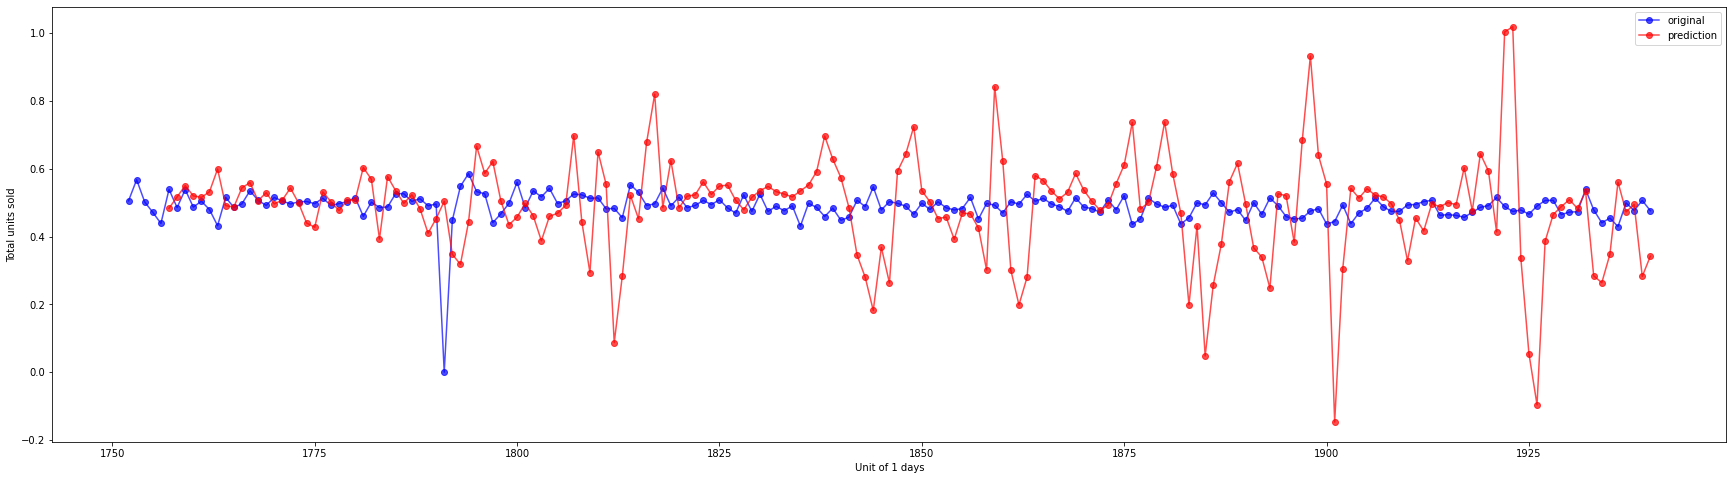

In [144]:
plt.figure(figsize=(30,8))

# lr_y_pred_train = lr_model.predict(trainset.iloc[:,:-1])

plt.plot(testset['t'], testset['y'], alpha=0.7, marker='o', c='b', label="original")
plt.plot(testset['t'][5:], predictions, alpha=0.7, marker='o', c='r', label="prediction")

plt.legend() 
plt.xlabel(f'Unit of 1 days')
plt.ylabel('Total units sold')
# plt.title(f'Graph showing sales of {item_id} for every {r} days')
plt.show()

In [145]:
###########################################################
# TRAIN THE NETWORK AND PREDICT - With previous values of y
###########################################################

in_dim = train_windows_y_inc.shape[1] - 1
NN = Network(input_dim=in_dim, hidden_dim=50, output_dim=1)
t0 = time.time()
eml_residuals = NN.train(x = train_windows_y_inc.iloc[:,:-1], 
                     y = train_windows_y_inc.iloc[:,-1].values.reshape(-1,1))
tF = time.time()

eml_fit_inc = NN.predict(train_windows_y_inc.iloc[:,:-1])
eml_pred_inc = NN.predict(test_windows_y_inc.iloc[:,:-1])

eml_residuals_inc = eml_pred_inc - testset.iloc[w:, -1].values.reshape(-1,1)
eml_rmse_inc = np.sqrt(np.sum(np.power(eml_residuals_inc,2)) / len(eml_residuals_inc))
print('RMSE = %.2f' % eml_rmse_inc)
print('Time to train %.2f' % (tF - t0))

SVD computed.. calculating Pseudoinverse..
W2 values updated..
RMSE = 0.06
Time to train 0.07


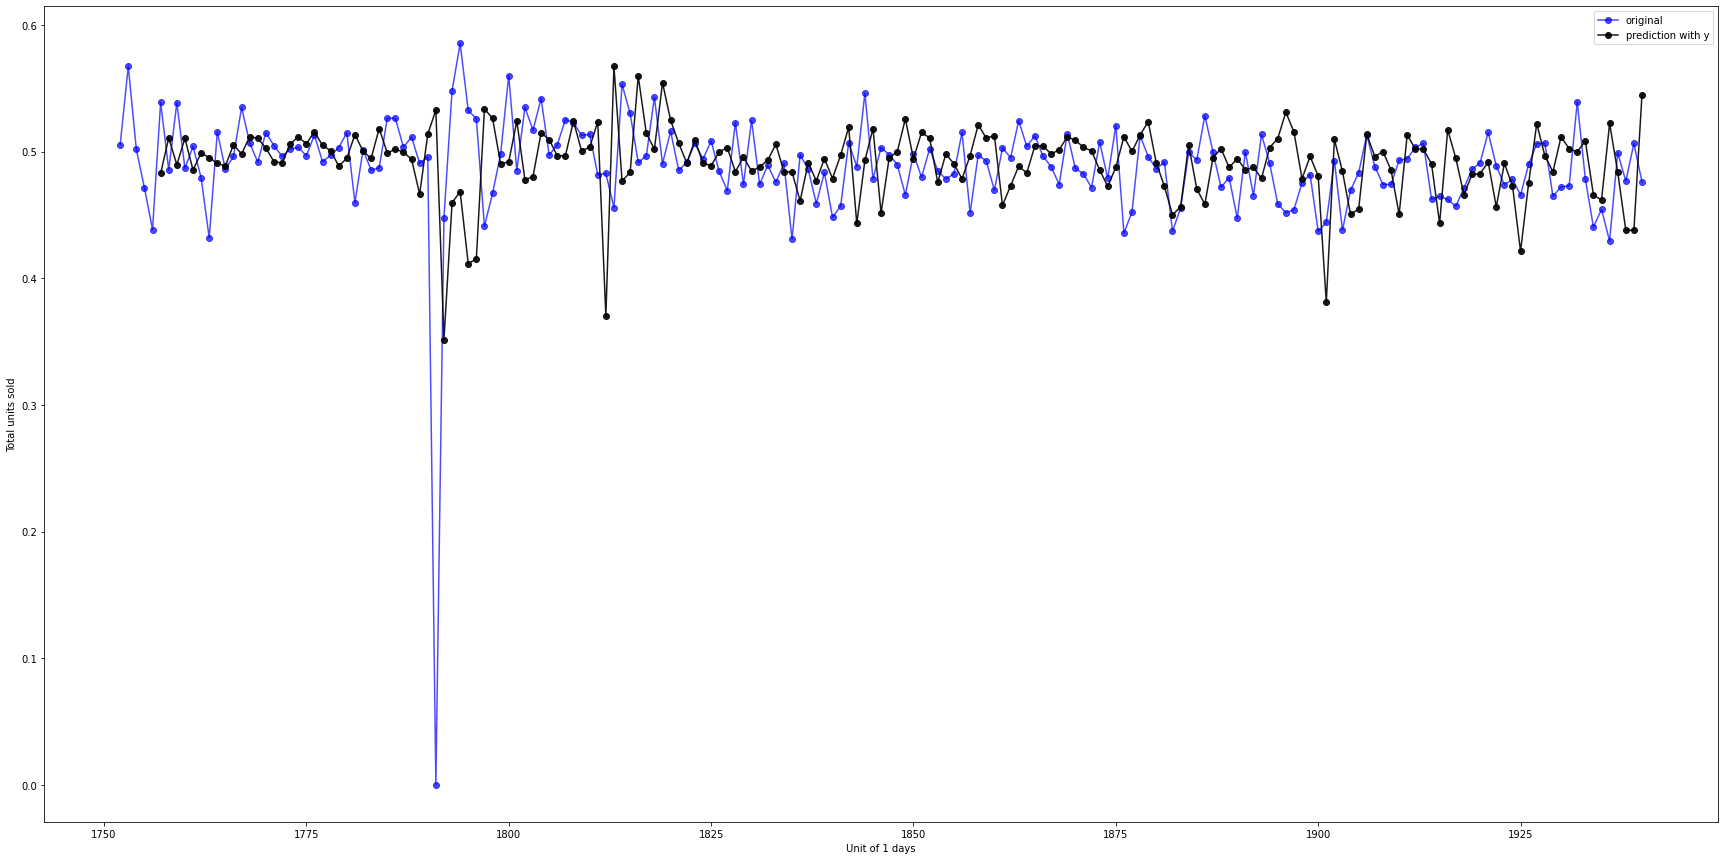

In [149]:
plt.figure(figsize=(30,15))

# lr_y_pred_train = lr_model.predict(trainset.iloc[:,:-1])

plt.plot(testset['t'], testset['y'], alpha=0.7, marker='o', c='b', label="original")
plt.plot(testset['t'][5:], eml_pred_inc, alpha=0.9, marker='o', c='black', label="prediction with y")
# plt.plot(testset['t'][5:], predictions, alpha=0.7, marker='o', c='r', label="prediction without y")

plt.legend() 
plt.xlabel(f'Unit of 1 days')
plt.ylabel('Total units sold')
# plt.title(f'Graph showing sales of {item_id} for every {r} days')
plt.show()